Import Relevant Libraries

In [1616]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data Set and Reviewing the Data.

It seeks to inspect the first 10 rows of the data set.


In [1617]:
#reading the data set using pandas dataframe
#assign the dataframe to variable name bom_movies
df= pd.read_csv('./Data/bom.movie_gross.csv')
bom_movies= df

In [1618]:
#Show dataframe information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [1619]:
#checking number of rows and columns in the dataset
bom_movies.shape

(3387, 5)

In [1620]:
#inspecting the first 10 rows of the data set
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1621]:
#inspecting the last 10 rows of the data set
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [1622]:
#view the columns of the data set
bom_movies.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Data Understanding
Inspecting the dataframe, Inspecting the Statistical Summary of the Dataset

In [1623]:
#statistical summary of the data set for the foreign gross and domestic gross .
#descriptive summary shows the mean, stardard deviation, min, max values, quartiles.
print(bom_movies.describe())

       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


Reviewing the Missing values in the Box Office Mojo Data

Findings.
There 5 missing values in studio column, 28 missing values in domestic gross and foreign gross are 1350.

In [1624]:
#check missing values in the whole data in DataFrame
#display sum of missing values in each column
print(bom_movies.isna().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Data Cleaning of Box Office Movies
The section section seeks to handle missing values in the dataset to allow quality information for decision making

In [1625]:
# Convert 'foreign_gross' column from object type to float
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '').astype(float)

#missing values and replacing with median
#check median for domestic gross
domestic_gross_median = bom_movies['domestic_gross'].median()

#foreign gross median
foreign_gross_median = bom_movies['foreign_gross'].median()

#handle missing values in domestic gross and foreign gross columns
bom_movies['domestic_gross'].fillna(domestic_gross_median, inplace=True)
bom_movies['foreign_gross'].fillna(foreign_gross_median,inplace = True)

# Drop rows where 'studio' column has missing  values
bom_movies = bom_movies[(bom_movies['studio'].notnull()) & (bom_movies['studio'] != '')]

# Display the clean dataframe
print(bom_movies)



                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

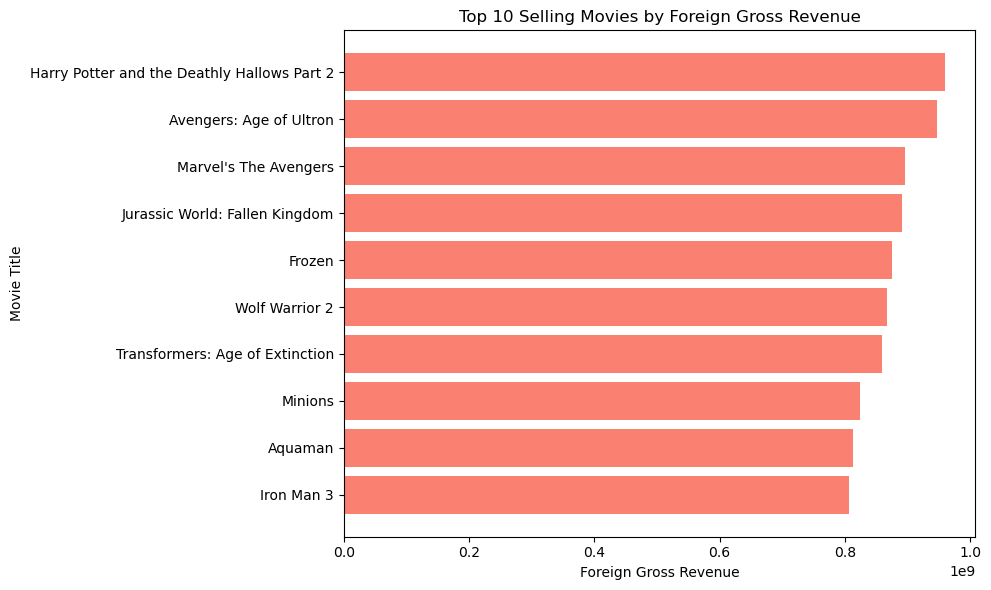

In [1626]:
# Get the top selling movies based on foreign gross revenue
top_selling_foreign_movies = bom_movies.nlargest(10, 'foreign_gross')

# Create a bar chart for top selling movies in foreign gross
plt.figure(figsize=(10, 6))
plt.barh(top_selling_foreign_movies['title'], top_selling_foreign_movies['foreign_gross'], color='salmon')
plt.xlabel('Foreign Gross Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Selling Movies by Foreign Gross Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to display the top movie at the top
plt.tight_layout()

# Show the plot
plt.show()

The plot shows the top selling movies to the foreign movies. Project previews which movies could be generating top revenues in the foreign market. Thi is backed by that foreign market have more total gross than domestic . 

It is challenging to narrow down with genre of the movie for all the movies provided. This will require further research for all the movies provided with their genre. 

With Genre analysis Micorsoft can narrow down to the most selling genre, this will help it launch a studio with top most selling genre.

Analyisis of Movies Revenue Generated. 
This will be an analysis of revenue generated over time in comparison between domestic and foreign gross

In [1627]:
# Analyze trends in domestic and foreign gross over the years
yearly_trends = bom_movies.groupby('year')[['domestic_gross', 'foreign_gross']].mean()
print("Domestic and Foreign Gross Revenue Trend by Years:")
print(yearly_trends)

Domestic and Foreign Gross Revenue Trend by Years:
      domestic_gross  foreign_gross
year                               
2010    3.108205e+07   4.474850e+07
2011    2.529369e+07   4.434645e+07
2012    2.728072e+07   4.972152e+07
2013    3.085523e+07   5.521113e+07
2014    2.625211e+07   5.048012e+07
2015    2.456179e+07   4.454946e+07
2016    2.582076e+07   5.418748e+07
2017    3.416646e+07   7.063448e+07
2018    3.601042e+07   6.493179e+07


Visualise Domestic and Foreign Gross Revenue Trend by Years

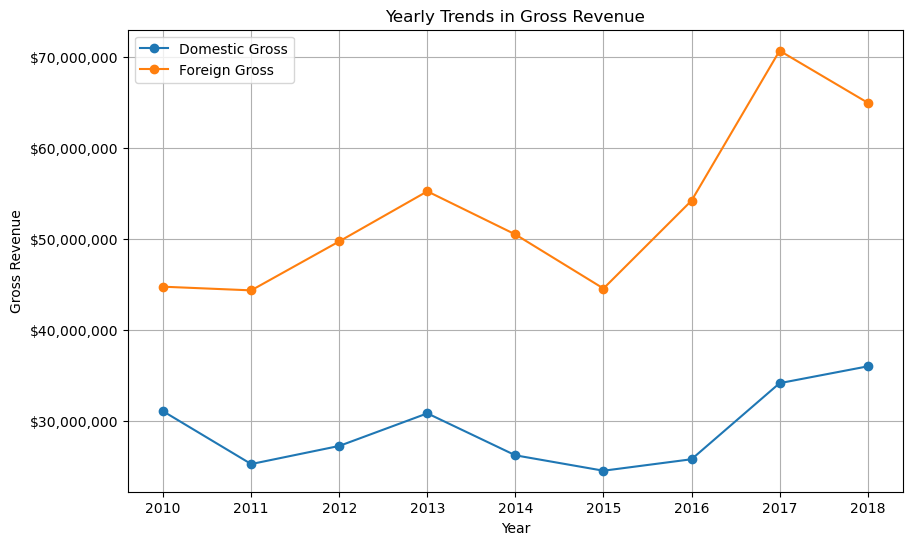

In [1628]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
#plot the yearly trends and labels
ax.plot(yearly_trends.index, yearly_trends['domestic_gross'], label='Domestic Gross', marker='o')
ax.plot(yearly_trends.index, yearly_trends['foreign_gross'], label='Foreign Gross', marker='o')
#label the the plot for readabiity
ax.set_title('Yearly Trends in Gross Revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Gross Revenue')
ax.legend()
ax.grid(True)

# Function to format y-axis labels with a dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

#dollar sign formating on y-axis
formatter = FuncFormatter(dollar_formatter)
ax.yaxis.set_major_formatter(formatter)

plt.show()

Trend Analysis of Gross in Domestic and Foreign 
This is a trend analysis of domestic and foreign gross over diffrent times of the year. It shows that the foreign market over time has been over above $40M revenues with the domestic market struggling to hit $40M mark.
The revenues in the domestic market may have been influenced by factors that lead to low revenue.

Recommendation.
Movie studios should have a budget for marketing their movies in the production countries to match with the foreign market.

Average Gross of Movie Studios
The bar chart explores the average gross of the movie studios both in the domestic and foreign market.

 Bar Charts of the gross revenues for Top 10 Studios in both the foreign and domestic market.

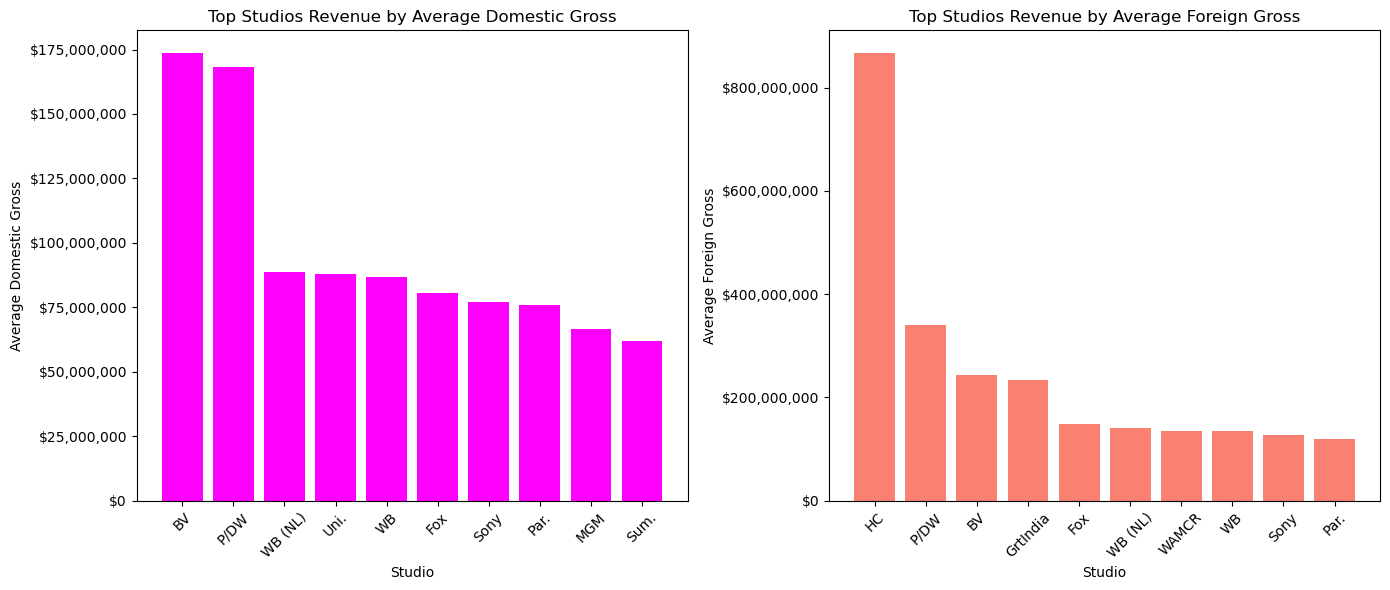

In [1629]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate average domestic and foreign gross per studio
avg_domestic = bom_movies.groupby('studio')['domestic_gross'].mean().nlargest(10)
avg_foreign = bom_movies.groupby('studio')['foreign_gross'].mean().nlargest(10)

# Create two subplots for domestic and foreign gross
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Function to format y-axis labels with a dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Apply dollar formatting to the y-axis labels
formatter = FuncFormatter(dollar_formatter)

# Plotting domestic gross
axs[0].bar(avg_domestic.index, avg_domestic.values, color='magenta')
axs[0].set_title('Top Studios Revenue by Average Domestic Gross')
axs[0].set_xlabel('Studio')
axs[0].set_ylabel('Average Domestic Gross')
axs[0].tick_params(axis='x', rotation=45)
axs[0].yaxis.set_major_formatter(formatter)

axs[1].bar(avg_foreign.index, avg_foreign.values, color='salmon')
axs[1].set_title('Top Studios Revenue by Average Foreign Gross')
axs[1].set_xlabel('Studio')
axs[1].set_ylabel('Average Foreign Gross')
axs[1].tick_params(axis='x', rotation=45)
axs[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Top 10 studios Revenues in Domestic and Foreign
This bar chart visualizes the  revenues for domestic and foreign. It depicts that the average in foreign markets is higher than in the domestic. This could be due of factors of many countries vs the country where it may be influenced by customer size, culture and  economic factors of the country, however, the factors are part of the assumptions that could have led to low revenue in domestic than in the foreign.

The studio perfomance of the the top 10 in terms of revenue depicts that they understand the market demography, audience prefreence. However, the insights limits us in finding the most selling genre in the movie industry.
However, the insights provides the possible partners for Microsoft in strenthening its production capabilities to increase likelihood of financial sucesses.

Microsoft leverages on the revenue trends over time, and studio perfomances to reduce movies that aren't appealing to the audience. The data will help in making more meaningful decisions.



Top Performing Studios by Revenue
The project conducts assessment of the Studio Performance by their Total Gross both for foreign and domestic gross

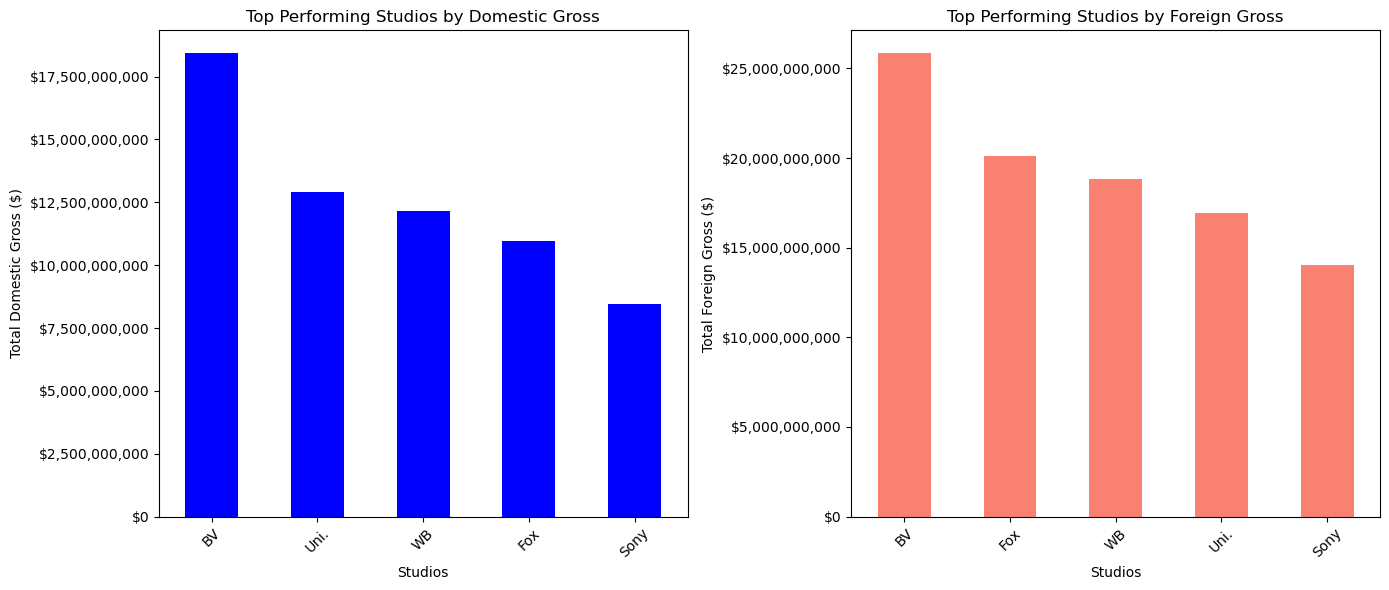

In [1630]:
# Grouping by studio for analysis
domestic_total_gross_by_studio= bom_movies.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
revenue_by_studio_foreign = bom_movies.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)

# Top performing studios for both domestic and foreign gross
top_studios_domestic = domestic_total_gross_by_studio.head(5)
top_studios_foreign = revenue_by_studio_foreign.head(5)

# Creating subplots with axs for domestic and foreign gross
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Function to format y-axis labels with a currency US dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Apply dollar formatting to the y-axis labels
formatter = FuncFormatter(dollar_formatter)
# Total Studios Domestic Gross subplot
top_studios_domestic.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Top Performing Studios by Domestic Gross')
axs[0].set_xlabel('Studios')
axs[0].set_ylabel('Total Domestic Gross ($)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].yaxis.set_major_formatter(formatter)

# Total studios Foreign Gross subplot
top_studios_foreign.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Top Performing Studios by Foreign Gross')
axs[1].set_xlabel('Studios')
axs[1].set_ylabel('Total Foreign Gross ($)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

The bar chart shows the studio performance in both domestic and foreign. 
It is evident that all the top perfoming studios in the domestic are gerating more revenue in the foreign audience. BV studio is leading in revenues in all sectors both in domestic and foreign. Therefore, BV studio produces movies that are universal resonating with culture or adventure. In addition, the top perfominng studios might be producing popular genres that are in demand both appealing to the domestic and foreign markets

Business Inisght.
Microsoft should conduct a talent study on the experience of the directors, to leverage on the best talent in a movie studio of optimum revenue. In addition, on tech expertise in the movie studio in production of films.

In [1631]:
#use the foreign gross and domestic gross to find their relationship
correlation = bom_movies['foreign_gross'].corr(bom_movies['domestic_gross'])
correlation

0.7840594568087642

There is a strong relationship between gross generated in the domestic and foreign market. The relationship infers that all movies produced appeal across the borders,and the cinephiles (movies fans) have a similar taste/ preferrence of the movies that they are attacted to watch.

Plot a scatterplot to show the relationship between Domestic gross and Foreign Gross

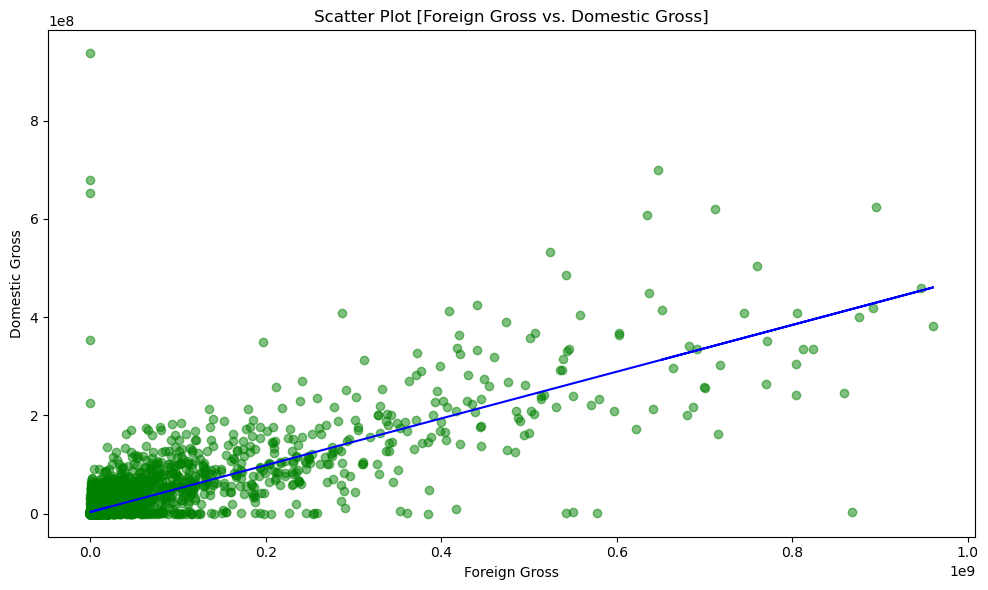

In [1632]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

# Use om_movies columns that are  'Foreign Gross' and 'Domestic Gross' columns
# Scatter plot between 'Foreign Gross' and 'Domestic Gross'
plt.figure(figsize=(10, 6))

plt.scatter(bom_movies['foreign_gross'], bom_movies['domestic_gross'], color='green', alpha=0.5)

#plot a linear line
x = bom_movies['foreign_gross'].values.reshape(-1, 1)
y = bom_movies['domestic_gross'].values.reshape(-1, 1)

model = LinearRegression().fit(x, y)
plt.plot(x, model.predict(x), color='blue', label='Linear Regression Line')
# Adding labels and title
plt.xlabel('Foreign Gross')
plt.ylabel('Domestic Gross')
plt.title('Scatter Plot [Foreign Gross vs. Domestic Gross]')

# Display the plot
plt.tight_layout()
plt.show()


There is a strong relationship between the domestic and foreign gross. This is an assumption that movies produced have a universal appealing attracting movie enthusiasists across the globe. Therefore, movies that have a demand in the domestic as well in foreign market thus a strong relationship between domestic and foreign gross as the correlation coefficient is at 0.78

Microsoft should invest in production of movies that are appealing in the domestic sector and in foreign production. A working strategy involve tailor the movies that are both localised and global appealing to optimize revenue streams.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

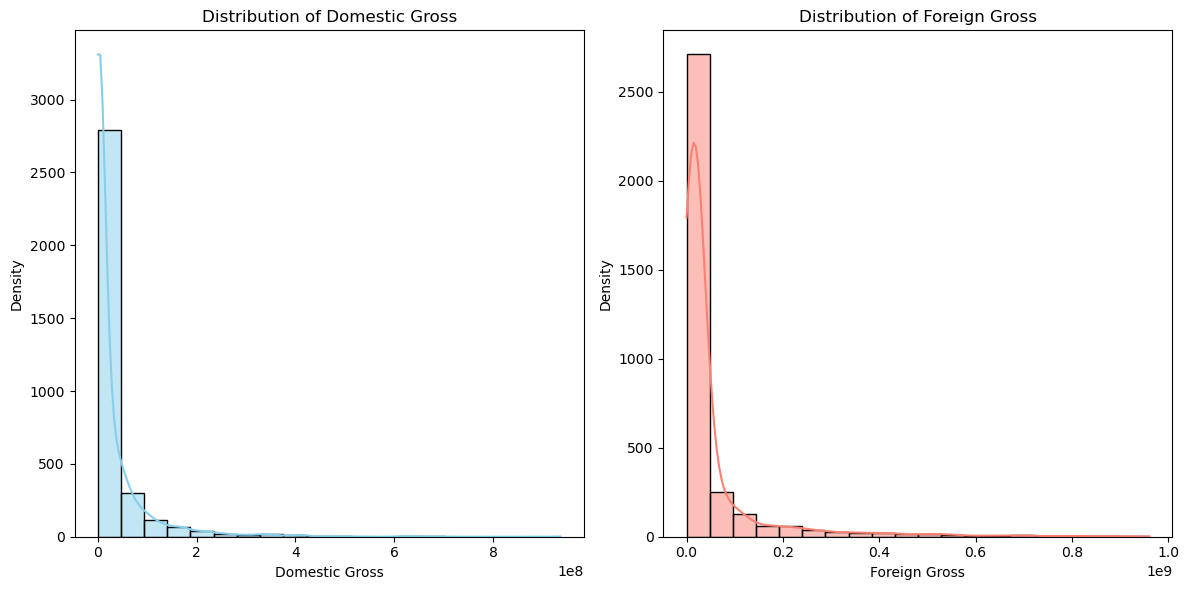

In [1633]:
import seaborn as sns

# Create a figure and axes for subplots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting density plots for domestic gross and foreign gross
sns.histplot(df['domestic_gross'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Domestic Gross')
axes[0].set_xlabel('Domestic Gross')
axes[0].set_ylabel('Density')

sns.histplot(df['foreign_gross'], bins=20, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Foreign Gross')
axes[1].set_xlabel('Foreign Gross')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


Histogram Review

In the plotted histogram, this proect seeks to understand the distribution of the revenues both in domestic and foreign markets
The distribtion is skewed to the right and data is distributed in an assymetrical manner. Furthermore there are unrevealed factors that have led to skewness. It may suggest that majority of movies require low budget to produce quality movies/films to appeal the audience.

This dataset limits in proving the influencing factors to skewness. It would helpful to understand the audience or demographics based on the skewed distribution or the budgeting on the movies
Recommendation. 
Microsoft adopting cost effective production stategy could help Microsoft generate more revenue in movie projects that are expensive to produce high quality movies to appeal the audience. However this will 

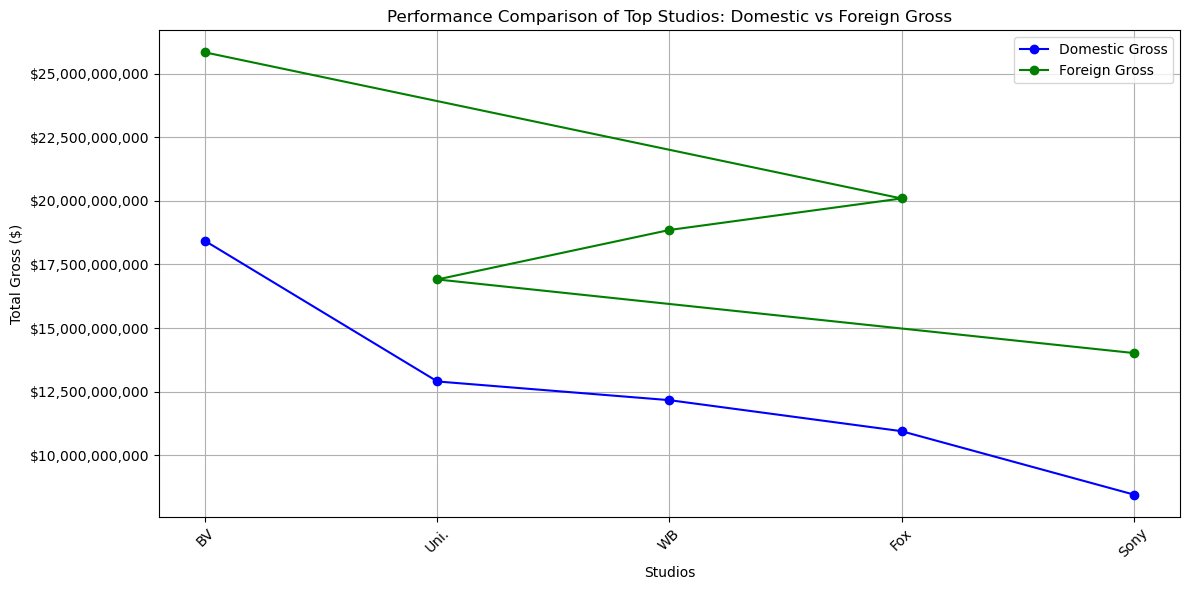

In [1634]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'bom_movies' DataFrame contains relevant data for domestic and foreign gross by studios

# Grouping by studio for analysis
domestic_total_gross_by_studio = bom_movies.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
revenue_by_studio_foreign = bom_movies.groupby('studio')['foreign_gross'].sum().sort_values(ascending=False)

# Top performing studios for both domestic and foreign gross
top_studios_domestic = domestic_total_gross_by_studio.head(5)
top_studios_foreign = revenue_by_studio_foreign.head(5)

# Plotting the trendlines for domestic and foreign gross for top studios
plt.figure(figsize=(12, 6))

# Plotting domestic gross trendline for top studios
plt.plot(top_studios_domestic.index, top_studios_domestic.values, marker='o', label='Domestic Gross', color='blue')

# Plotting foreign gross trendline for top studios
plt.plot(top_studios_foreign.index, top_studios_foreign.values, marker='o', label='Foreign Gross', color='green')

# Set plot title and labels
plt.title('Performance Comparison of Top Studios: Domestic vs Foreign Gross')
plt.xlabel('Studios')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Function to format y-axis labels with a currency US dollar sign
def dollar_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Apply dollar formatting to the y-axis labels
formatter = FuncFormatter(dollar_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
